# Import packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from functools import reduce


# Functions

- This function is to read csv files saved with the first row that holds the dtypes of all columns. https://stackoverflow.com/questions/50047237/how-to-preserve-dtypes-of-dataframes-when-using-to-csv

In [2]:
def read_csv(path):
    # Read types first line of csv
    dtypes = {key:value for (key,value) in pd.read_csv(path,    
              nrows=1).iloc[0].to_dict().items() if 'date' not in value}

    parse_dates = [key for (key,value) in pd.read_csv(path, 
                   nrows=1).iloc[0].to_dict().items() if 'date' in value]
    # Read the rest of the lines with the types from above
    return pd.read_csv(path, dtype=dtypes, parse_dates=parse_dates, skiprows=[1])

# Load datasets

In [4]:
# read csv using the above function
demographics = read_csv("../Clean_datasets/CustomerDemographic.csv")
addresses = read_csv("../Clean_datasets/CustomerAddress.csv")
transactions = read_csv("../Clean_datasets/Transactions.csv")

In [5]:
demographics.head(1)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,67


In [6]:
addresses.head(1)

,customer_id,new_address,postcode,state,property_valuation
0,1,60 Morning Avenue,2016,New South Wales,10


In [7]:
transactions.head(1)

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Solex,Standard,medium,medium,71.49,53.62,2012-12-04


# Data Transformation

In [8]:
# Simplify job_title into 9 categories

dic = {'Account': 'Professional',
       'Accountant': 'Professional',
       'Technical': 'Professional',
       'Actuary': 'Professional',
       'Analyst': 'Professional',
       'Professor': 'Professional',
       'Teacher': 'Professional',
       'Scientist': 'Professional',
       'Social': 'Community and personal service workers',
       'Advisor': 'Professional',
       'Payment': 'Professional',
       'Specialist': 'Professional',
       'Legal': 'Professional',
       'Paralegal': 'Professional',
       'Biostatistician': 'Professional',
       'Geologist': 'Professional',
       'Statistician': 'Professional',
       'Data': 'Professional',
       'Tech': 'Professional',
       'Programmer': 'Professional',
       'Software': 'Professional',
       'Dental': 'Professional',
       'Health': 'Professional',
       'Nurse': 'Professional',
       'Pharmacist': 'Professional',
       'Pathologist': 'Professional',
       'Therapist': 'Professional',
       'Therapy': 'Professional',
       'Engineer': 'Professional',
       'Chemist': 'Professional',
       'Research': 'Professional',
       'Developer': 'Professional',
       'Marketing': 'Professional',
       'Technician': 'Technician and trade workers',
       'Designer': 'Technician and trade workers',
       'Editor': 'Technician and trade worker',
       'Planner': 'Others',
       'Auditor': 'Others',
       'job_title': 'Others',
       'Office Assistant': 'Others',
       'Unknown': 'Others',
       'Administrative': 'Clerical and admin workers',
       'Administrator': 'Clerical and admin workers',
       'Secretary': 'Clerical and admin workers',
       'Help Desk': 'Clerical and admin workers',
       'Human Resources': 'Clerical and admin workers',
       'Recruiter': 'Clerical and admin workers',
       'Librarian': 'Clerical and admin workers',
       'Administrator': 'Clerical and admin workers', 
       'Manager': 'Manager',
       'Director': 'Manager',
       'Executive': 'Manager',
       'VP': 'Manager',
       'Operator': 'Operators and drivers',
       'Sales': 'Sales workers'}

In [9]:
# Mapping the original job title to a more general category
demographics['job_category'] = demographics['job_title']

for k, v in dic.items():
    demographics['job_category'] = np.where(demographics['job_title'].str.contains(k, case=False), v, demographics['job_category'])

In [10]:
# Categorize customers into generations

# Create year column for binning
demographics['birth_year'] = demographics['DOB'].dt.year

# Bin the birthyear column into generations
bins= [1900, 1945, 1964, 1976, 1995, 2015]
labels = ['Traditionalists','Baby boomers','Gen X','Millennials','Gen Z']
demographics['generation'] = pd.cut(demographics['birth_year'], bins=bins, labels=labels, right=False)

In [11]:
# Bin the Age column into life stage column
bins= [0, 18, 35, 50, 65, 130]
labels = ['Youth','Young Adults','Middle Age','Advanced Age','Retired Age']
demographics['age_group'] = pd.cut(demographics['Age'], bins=bins, labels=labels, right=False)

In [12]:
scores = [1, 2, 3, 4]

purchases_scores = pd.qcut(demographics["past_3_years_bike_related_purchases"], q = 4, labels=scores)
tenure_scores = pd.qcut(demographics["tenure"], q = 4, labels=scores)

demographics['purchases_score'] = purchases_scores
demographics['tenure_score'] = tenure_scores

demographics

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,Age,job_category,birth_year,generation,age_group,purchases_score,tenure_score
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,67,Manager,1953,Baby boomers,Retired Age,4,3
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,Yes,16.0,40,Clerical and admin workers,1980,Millennials,Middle Age,4,4
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,Yes,15.0,67,Manager,1954,Baby boomers,Retired Age,3,3
3,4,Talbot,Unknown,Male,33,1961-10-03,Unknown,IT,Mass Customer,No,7.0,59,Others,1961,Baby boomers,Advanced Age,2,2
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Unknown,Affluent Customer,Yes,8.0,44,Technician and trade worker,1977,Millennials,Middle Age,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,No,19.0,45,Manager,1975,Gen X,Middle Age,1,4
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,Yes,1.0,19,Professional,2001,Gen Z,Young Adults,4,1
3997,3998,Sarene,Woolley,Unknown,60,1978-01-30,Assistant Manager,IT,High Net Worth,No,1.0,43,Manager,1978,Millennials,Middle Age,3,1
3998,3999,Patrizius,Unknown,Male,11,1973-10-24,Unknown,Manufacturing,Affluent Customer,Yes,10.0,47,Others,1973,Gen X,Middle Age,1,2


In [13]:
# Drop unnessary columns

# demographics.drop(['first_name', 'last_name', 'job_title', 'birth_year', 'DOB'], axis=1, inplace = True)
demographics = demographics[['customer_id', 'gender', 'generation', 'age_group', 'job_category', 'job_industry_category', 'tenure_score', 'wealth_segment', 'owns_car', 'purchases_score']]

In [14]:
demographics

,customer_id,gender,generation,age_group,job_category,job_industry_category,tenure_score,wealth_segment,owns_car,purchases_score
0,1,Female,Baby boomers,Retired Age,Manager,Health,3,Mass Customer,Yes,4
1,2,Male,Millennials,Middle Age,Clerical and admin workers,Financial Services,4,Mass Customer,Yes,4
2,3,Male,Baby boomers,Retired Age,Manager,Property,3,Mass Customer,Yes,3
3,4,Male,Baby boomers,Advanced Age,Others,IT,2,Mass Customer,No,2
4,5,Female,Millennials,Middle Age,Technician and trade worker,Unknown,2,Affluent Customer,Yes,3
...,...,...,...,...,...,...,...,...,...,...
3995,3996,Female,Gen X,Middle Age,Manager,Health,4,Mass Customer,No,1
3996,3997,Female,Gen Z,Young Adults,Professional,Manufacturing,1,High Net Worth,Yes,4
3997,3998,Unknown,Millennials,Middle Age,Manager,IT,1,High Net Worth,No,3
3998,3999,Male,Gen X,Middle Age,Others,Manufacturing,2,Affluent Customer,Yes,1


In [15]:
addresses

,customer_id,new_address,postcode,state,property_valuation
0,1,60 Morning Avenue,2016,New South Wales,10
1,2,6 Meadow Vale Court,2153,New South Wales,10
2,4,Holy Cross Court,4211,QLD,9
3,5,17979 Del Mar Point,2448,New South Wales,4
4,6,9 Oakridge Court,3216,VIC,9
...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,3
3995,4000,57042 Village Green Point,4511,QLD,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,10
3997,4002,8194 Lien Street,4032,QLD,7


In [16]:
addresses = addresses[['customer_id', 'state', 'property_valuation']]

In [17]:
transactions

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Solex,Standard,medium,medium,71.49,53.62,2012-12-04
1,2,3,3120,2017-05-21,1.0,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05
2,3,37,402,2017-10-16,0.0,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22
3,4,88,3135,2017-08-31,0.0,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18
4,5,78,787,2017-10-01,1.0,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12
...,...,...,...,...,...,...,...,...,...,...,...,...
19440,19996,51,1018,2017-06-24,1.0,OHM Cycles,Standard,high,medium,2005.66,1203.40,2003-07-23
19441,19997,41,127,2017-11-09,1.0,Solex,Road,medium,medium,416.98,312.74,1997-05-12
19442,19998,87,2284,2017-04-14,1.0,OHM Cycles,Standard,medium,medium,1636.90,44.71,2010-08-22
19443,19999,6,2764,2017-07-03,0.0,OHM Cycles,Standard,high,medium,227.88,136.73,2004-08-19


In [18]:
# Create a new column for the profit of each transaction

transactions["order_profit"] = transactions.list_price - transactions.standard_cost

In [19]:
# Last date
last_date = transactions["transaction_date"].max()

In [20]:
# Create RFM Modelling scores
rfm_scores = transactions.groupby("customer_id").agg({
    "transaction_date": lambda x: (last_date - x.max()).days,
    "transaction_id": lambda x: len(x),
    "order_profit": lambda x: sum(x)})

rfm_scores

,transaction_date,transaction_id,order_profit
customer_id,,,
1,7,11,3018.090000
2,128,3,2226.260000
3,102,7,3290.210000
4,195,2,220.570000
5,16,6,2394.940000
...,...,...,...
3497,52,3,1648.320000
3498,127,6,3147.330000
3499,51,7,4955.250000


In [21]:
# Rename the columns
rfm_scores.columns = ["recency", "frequency", "monetary"]
rfm_scores

,recency,frequency,monetary
customer_id,,,
1,7,11,3018.090000
2,128,3,2226.260000
3,102,7,3290.210000
4,195,2,220.570000
5,16,6,2394.940000
...,...,...,...
3497,52,3,1648.320000
3498,127,6,3147.330000
3499,51,7,4955.250000


In [22]:
def rfm_tier(value, index, quantile):
    # If the index is recency, then the lower recency, the higher tier
    if value <= quantile[index][0.25]:
        if index == "recency":
            return 1
        else:
            return 4
    elif value <= quantile[index][0.50]:
        if index == "recency":
            return 2
        else:
            return 3
    elif value <= quantile[index][0.75]:
        if index == "recency":
            return 3
        else:
            return 2
    else:
        if index == "recency":
            return 4
        else:
            return 1

In [23]:
# Assigning tier values to R, F, and M for each customer


# Using quantiles to classify customers, setting into 4 segments
quantiles = rfm_scores.quantile([0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()

index_list = {"R": "recency", "F": "frequency", "M": "monetary"}
for k, v in index_list.items():
    rfm_scores[k] = rfm_scores[v].apply(rfm_tier, args=(v, quantiles))

rfm_scores

,recency,frequency,monetary,R,F,M
customer_id,,,,,,
1,7,11,3018.090000,1,1,2
2,128,3,2226.260000,4,4,3
3,102,7,3290.210000,4,2,2
4,195,2,220.570000,4,4,4
5,16,6,2394.940000,1,2,3
...,...,...,...,...,...,...
3497,52,3,1648.320000,3,4,4
3498,127,6,3147.330000,4,2,2
3499,51,7,4955.250000,3,2,1


In [24]:
# Assigning rfm_group to each customer by concatenating R, F, and M
rfm_scores["rfm_group"] = rfm_scores["R"].map(str) + rfm_scores["F"].map(str) + rfm_scores["M"].map(str)

# Calculating the rfm score for each customer by sum them
rfm_scores["rfm_score"] = rfm_scores[["R", "F", "M"]].sum(axis=1)

rfm_scores.head(10)

,recency,frequency,monetary,R,F,M,rfm_group,rfm_score
customer_id,,,,,,,,
1,7,11,3018.09,1,1,2,112,4
2,128,3,2226.26,4,4,3,443,11
3,102,7,3290.21,4,2,2,422,8
4,195,2,220.57,4,4,4,444,12
5,16,6,2394.94,1,2,3,123,6
6,64,5,3946.55,3,3,2,332,8
7,253,3,220.11,4,4,4,444,12
8,22,9,5364.39,2,1,1,211,4
9,78,6,2353.11,3,2,3,323,8


In [25]:
# Assigning loyalty tier to each customer
loyalty_tier = ["titanium", "platinum", "gold", "silver"]

# Using pandas quantile cut
score_cuts = pd.qcut(rfm_scores["rfm_score"], q = 4, labels=loyalty_tier)


# Create a new column for the loyalty tier
rfm_scores["loyalty_tier"] = score_cuts
rfm_scores.head(10)

,recency,frequency,monetary,R,F,M,rfm_group,rfm_score,loyalty_tier
customer_id,,,,,,,,,
1,7,11,3018.09,1,1,2,112,4,titanium
2,128,3,2226.26,4,4,3,443,11,silver
3,102,7,3290.21,4,2,2,422,8,platinum
4,195,2,220.57,4,4,4,444,12,silver
5,16,6,2394.94,1,2,3,123,6,titanium
6,64,5,3946.55,3,3,2,332,8,platinum
7,253,3,220.11,4,4,4,444,12,silver
8,22,9,5364.39,2,1,1,211,4,titanium
9,78,6,2353.11,3,2,3,323,8,platinum


In [26]:
transactions

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,order_profit
0,1,2,2950,2017-02-25,0.0,Solex,Standard,medium,medium,71.49,53.62,2012-12-04,17.87
1,2,3,3120,2017-05-21,1.0,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05,1702.55
2,3,37,402,2017-10-16,0.0,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22,1544.61
3,4,88,3135,2017-08-31,0.0,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18,817.36
4,5,78,787,2017-10-01,1.0,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12,1055.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19440,19996,51,1018,2017-06-24,1.0,OHM Cycles,Standard,high,medium,2005.66,1203.40,2003-07-23,802.26
19441,19997,41,127,2017-11-09,1.0,Solex,Road,medium,medium,416.98,312.74,1997-05-12,104.24
19442,19998,87,2284,2017-04-14,1.0,OHM Cycles,Standard,medium,medium,1636.90,44.71,2010-08-22,1592.19
19443,19999,6,2764,2017-07-03,0.0,OHM Cycles,Standard,high,medium,227.88,136.73,2004-08-19,91.15


In [27]:
# aggregate customer based on brand interaction

brand_int = transactions.groupby(["customer_id", "brand"], as_index = False)['transaction_id'].count()
brand_int = brand_int.rename(columns = {'transaction_id':'total_transactions'})
brand_int.head(10)

,customer_id,brand,total_transactions
0,1,Giant Bicycles,4
1,1,Norco Bicycles,2
2,1,OHM Cycles,2
3,1,Solex,2
4,1,Trek Bicycles,1
5,2,Giant Bicycles,1
6,2,WeareA2B,2
7,3,Giant Bicycles,2
8,3,Norco Bicycles,2
9,3,Trek Bicycles,3


In [28]:
brand_int.dtypes

customer_id            int64
brand                 object
total_transactions     int64
dtype: object

### Getting the favourite brand for each customer

In [30]:
# Sort the customer_id, followed by the transaction numbers
sorted_brand = brand_int.sort_values(by=["customer_id", "total_transactions"])
sorted_brand.head(10)

,customer_id,brand,total_transactions
4,1,Trek Bicycles,1
1,1,Norco Bicycles,2
2,1,OHM Cycles,2
3,1,Solex,2
0,1,Giant Bicycles,4
5,2,Giant Bicycles,1
6,2,WeareA2B,2
7,3,Giant Bicycles,2
8,3,Norco Bicycles,2
9,3,Trek Bicycles,3


In [32]:
# Getting the last (highest number of transactions) row as the most favourite brand
sorted_brand.drop_duplicates(subset=["customer_id"], keep="last", inplace=True)
sorted_brand.columns = ["customer_id", "favourite_brand", "total_transactions"]
sorted_brand

,customer_id,favourite_brand,total_transactions
0,1,Giant Bicycles,4
6,2,WeareA2B,2
9,3,Trek Bicycles,3
11,4,Solex,1
13,5,Norco Bicycles,2
...,...,...,...
12642,3497,Giant Bicycles,2
12647,3498,WeareA2B,2
12651,3499,WeareA2B,2
12655,3500,WeareA2B,2


In [98]:
favourite_brand = []

# customers_list = np.arange(1, 4001, 1).tolist()
customers_list = brand_int['customer_id'].unique().tolist()

for r in customers_list:
  df_temp = brand_int[brand_int['customer_id'] == r]
  max_index = df_temp['total_transactions'].argmax()
  favourite_brand.append(df_temp.iloc[max_index,1])

In [37]:
transaction_df = pd.DataFrame({
                              'customer_id': customers_list,
                               'favourite_brand': favourite_brand
})

In [38]:
transaction_df

,customer_id,favourite_brand
0,1,Giant Bicycles
1,2,WeareA2B
2,3,Trek Bicycles
3,4,Giant Bicycles
4,5,Norco Bicycles
...,...,...
3487,3497,Giant Bicycles
3488,3498,Solex
3489,3499,Giant Bicycles
3490,3500,Giant Bicycles


### Getting the favourite line for each customer

In [39]:
productline_int = transactions.groupby(["customer_id", "product_line"], as_index = False)['transaction_id'].count()
productline_int = productline_int.rename(columns = {'transaction_id':'total_transactions'})
productline_int

,customer_id,product_line,total_transactions
0,1,Mountain,1
1,1,Road,3
2,1,Standard,7
3,2,Standard,3
4,3,Mountain,1
...,...,...,...
7214,3499,Touring,1
7215,3500,Road,1
7216,3500,Standard,5
7217,5034,Road,2


In [41]:
# Sort the customer_id, followed by the transaction numbers
sorted_productline = productline_int.sort_values(by=["customer_id", "total_transactions"])
sorted_productline.head(10)

,customer_id,product_line,total_transactions
0,1,Mountain,1
1,1,Road,3
2,1,Standard,7
3,2,Standard,3
4,3,Mountain,1
5,3,Road,3
6,3,Standard,3
7,4,Standard,2
8,5,Mountain,1
10,5,Standard,2


In [42]:
# Getting the last (highest number of transactions) row as the most favourite productline
sorted_productline.drop_duplicates(subset=["customer_id"], keep="last", inplace=True)
sorted_productline.columns = ["customer_id", "favourite_line", "total_transactions"]
sorted_productline

,customer_id,favourite_line,total_transactions
2,1,Standard,7
3,2,Standard,3
6,3,Standard,3
7,4,Standard,2
9,5,Road,3
...,...,...,...
7209,3497,Standard,3
7210,3498,Standard,5
7213,3499,Standard,5
7216,3500,Standard,5


In [40]:
favourite_line= []

for r in customers_list:
  df_temp = productline_int[productline_int['customer_id'] == r]
  max_index = df_temp['total_transactions'].argmax()
  favourite_line.append(df_temp.iloc[max_index,1])

In [43]:
transaction_df['favourite_line'] = favourite_line

In [44]:
transaction_df

,customer_id,favourite_brand,favourite_line
0,1,Giant Bicycles,Standard
1,2,WeareA2B,Standard
2,3,Trek Bicycles,Road
3,4,Giant Bicycles,Standard
4,5,Norco Bicycles,Road
...,...,...,...
3487,3497,Giant Bicycles,Standard
3488,3498,Solex,Standard
3489,3499,Giant Bicycles,Standard
3490,3500,Giant Bicycles,Standard


In [45]:
product_class_int = transactions.groupby(["customer_id", "product_class"], as_index = False)['transaction_id'].count()
product_class_int = productline_int.rename(columns = {'transaction_id':'total_transactions'})
product_class_int

,customer_id,product_line,total_transactions
0,1,Mountain,1
1,1,Road,3
2,1,Standard,7
3,2,Standard,3
4,3,Mountain,1
...,...,...,...
7214,3499,Touring,1
7215,3500,Road,1
7216,3500,Standard,5
7217,5034,Road,2


In [46]:
favourite_class= []

for r in customers_list:
  df_temp = product_class_int[product_class_int['customer_id'] == r]
  max_index = df_temp['total_transactions'].argmax()
  favourite_class.append(df_temp.iloc[max_index,1])

In [47]:
transaction_df['favourite_class'] = favourite_class
transaction_df

,customer_id,favourite_brand,favourite_line,favourite_class
0,1,Giant Bicycles,Standard,Standard
1,2,WeareA2B,Standard,Standard
2,3,Trek Bicycles,Road,Road
3,4,Giant Bicycles,Standard,Standard
4,5,Norco Bicycles,Road,Road
...,...,...,...,...
3487,3497,Giant Bicycles,Standard,Standard
3488,3498,Solex,Standard,Standard
3489,3499,Giant Bicycles,Standard,Standard
3490,3500,Giant Bicycles,Standard,Standard


In [48]:
product_size_int = transactions.groupby(["customer_id", "product_size"], as_index = False)['transaction_id'].count()
product_size_int = product_size_int.rename(columns = {'transaction_id':'total_transactions'})
product_size_int

,customer_id,product_size,total_transactions
0,1,medium,9
1,1,small,2
2,2,medium,3
3,3,large,3
4,3,medium,2
...,...,...,...
7680,3499,large,1
7681,3499,medium,6
7682,3500,medium,5
7683,3500,small,1


In [49]:
favourite_size= []

for r in customers_list:
  df_temp = product_size_int[product_size_int['customer_id'] == r]
  max_index = df_temp['total_transactions'].argmax()
  favourite_size.append(df_temp.iloc[max_index,1])

In [50]:
transaction_df['favourite_size'] = favourite_size
transaction_df

,customer_id,favourite_brand,favourite_line,favourite_class,favourite_size
0,1,Giant Bicycles,Standard,Standard,medium
1,2,WeareA2B,Standard,Standard,medium
2,3,Trek Bicycles,Road,Road,large
3,4,Giant Bicycles,Standard,Standard,large
4,5,Norco Bicycles,Road,Road,large
...,...,...,...,...,...
3487,3497,Giant Bicycles,Standard,Standard,medium
3488,3498,Solex,Standard,Standard,medium
3489,3499,Giant Bicycles,Standard,Standard,medium
3490,3500,Giant Bicycles,Standard,Standard,medium


In [51]:
online_order_int = transactions.groupby(["customer_id", "online_order"], as_index = False)['transaction_id'].count()
online_order_int = online_order_int.rename(columns = {'transaction_id':'total_transactions'})
online_order_int.head(20)

,customer_id,online_order,total_transactions
0,1,0.0,5
1,1,1.0,6
2,2,0.0,2
3,2,1.0,1
4,3,0.0,6
5,3,1.0,1
6,4,0.0,1
7,4,1.0,1
8,5,0.0,4
9,5,1.0,2


In [52]:
favourite_method = []

for r in customers_list:
  df_temp = online_order_int[online_order_int['customer_id'] == r]
  max_index = df_temp['total_transactions'].argmax()
  favourite_method.append(df_temp.iloc[max_index,1])

In [53]:
transaction_df['favourite_method'] = favourite_method
transaction_df

# 1 is online, 0 is offline

,customer_id,favourite_brand,favourite_line,favourite_class,favourite_size,favourite_method
0,1,Giant Bicycles,Standard,Standard,medium,1.0
1,2,WeareA2B,Standard,Standard,medium,0.0
2,3,Trek Bicycles,Road,Road,large,0.0
3,4,Giant Bicycles,Standard,Standard,large,0.0
4,5,Norco Bicycles,Road,Road,large,0.0
...,...,...,...,...,...,...
3487,3497,Giant Bicycles,Standard,Standard,medium,1.0
3488,3498,Solex,Standard,Standard,medium,1.0
3489,3499,Giant Bicycles,Standard,Standard,medium,1.0
3490,3500,Giant Bicycles,Standard,Standard,medium,0.0


In [54]:
transactions.head(1)

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,order_profit
0,1,2,2950,2017-02-25,0.0,Solex,Standard,medium,medium,71.49,53.62,2012-12-04,17.87


In [55]:
transaction_df['loyalty_tier'] = rfm_scores['loyalty_tier'].values
transaction_df

,customer_id,favourite_brand,favourite_line,favourite_class,favourite_size,favourite_method,loyalty_tier
0,1,Giant Bicycles,Standard,Standard,medium,1.0,titanium
1,2,WeareA2B,Standard,Standard,medium,0.0,silver
2,3,Trek Bicycles,Road,Road,large,0.0,platinum
3,4,Giant Bicycles,Standard,Standard,large,0.0,silver
4,5,Norco Bicycles,Road,Road,large,0.0,titanium
...,...,...,...,...,...,...,...
3487,3497,Giant Bicycles,Standard,Standard,medium,1.0,silver
3488,3498,Solex,Standard,Standard,medium,1.0,platinum
3489,3499,Giant Bicycles,Standard,Standard,medium,1.0,titanium
3490,3500,Giant Bicycles,Standard,Standard,medium,0.0,gold


In [56]:
# Convert customer_id from transaction_df to object
transaction_df['customer_id'] = transaction_df['customer_id'].astype('object')

In [57]:
demographics.head(5)

,customer_id,gender,generation,age_group,job_category,job_industry_category,tenure_score,wealth_segment,owns_car,purchases_score
0,1,Female,Baby boomers,Retired Age,Manager,Health,3,Mass Customer,Yes,4
1,2,Male,Millennials,Middle Age,Clerical and admin workers,Financial Services,4,Mass Customer,Yes,4
2,3,Male,Baby boomers,Retired Age,Manager,Property,3,Mass Customer,Yes,3
3,4,Male,Baby boomers,Advanced Age,Others,IT,2,Mass Customer,No,2
4,5,Female,Millennials,Middle Age,Technician and trade worker,Unknown,2,Affluent Customer,Yes,3


In [58]:
addresses.head(5)

,customer_id,state,property_valuation
0,1,New South Wales,10
1,2,New South Wales,10
2,4,QLD,9
3,5,New South Wales,4
4,6,VIC,9


In [ ]:
transaction_df.head(5)

,customer_id,favourite_brand,favourite_line,favourite_class,favourite_size,favourite_method,loyalty_tier
0,1,Giant Bicycles,Standard,Standard,medium,1.0,titanium
1,2,WeareA2B,Standard,Standard,medium,0.0,silver
2,3,Trek Bicycles,Road,Road,large,0.0,platinum
3,4,Giant Bicycles,Standard,Standard,large,0.0,silver
4,5,Norco Bicycles,Road,Road,large,0.0,titanium


In [97]:
demographics.customer_id.dtypes

dtype('O')

In [93]:
all_data_temp = pd.merge(demographics.assign(customer_id=demographics.customer_id.astype(int)), 
                        addresses.assign(customer_id=addresses.customer_id.astype(int)),
                        how="left", on="customer_id")
all_data = pd.merge(all_data_temp.assign(customer_id=all_data_temp.customer_id.astype(int)),
                    transaction_df.assign(customer_id=transaction_df.customer_id.astype(int)),
                        how="left", on="customer_id")
all_data

,customer_id,gender,generation,age_group,job_category,job_industry_category,tenure_score,wealth_segment,owns_car,purchases_score,state,property_valuation,favourite_brand,favourite_line,favourite_class,favourite_size,favourite_method,loyalty_tier
0,1,Female,Baby boomers,Retired Age,Manager,Health,3,Mass Customer,Yes,4,New South Wales,10.0,Giant Bicycles,Standard,Standard,medium,1.0,titanium
1,2,Male,Millennials,Middle Age,Clerical and admin workers,Financial Services,4,Mass Customer,Yes,4,New South Wales,10.0,WeareA2B,Standard,Standard,medium,0.0,silver
2,3,Male,Baby boomers,Retired Age,Manager,Property,3,Mass Customer,Yes,3,NaN,NaN,Trek Bicycles,Road,Road,large,0.0,platinum
3,4,Male,Baby boomers,Advanced Age,Others,IT,2,Mass Customer,No,2,QLD,9.0,Giant Bicycles,Standard,Standard,large,0.0,silver
4,5,Female,Millennials,Middle Age,Technician and trade worker,Unknown,2,Affluent Customer,Yes,3,New South Wales,4.0,Norco Bicycles,Road,Road,large,0.0,titanium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Female,Gen X,Middle Age,Manager,Health,4,Mass Customer,No,1,VIC,6.0,NaN,NaN,NaN,NaN,NaN,NaN
3996,3997,Female,Gen Z,Young Adults,Professional,Manufacturing,1,High Net Worth,Yes,4,NSW,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3997,3998,Unknown,Millennials,Middle Age,Manager,IT,1,High Net Worth,No,3,NSW,6.0,NaN,NaN,NaN,NaN,NaN,NaN
3998,3999,Male,Gen X,Middle Age,Others,Manufacturing,2,Affluent Customer,Yes,1,VIC,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Get all data together

dataframes = [demographics, addresses, transaction_df]
customer_data = reduce(lambda left, right: pd.merge(left, right, on='customer_id', how='left'), dataframes)

customer_data

,customer_id,gender,generation,age_group,job_category,job_industry_category,tenure_score,wealth_segment,owns_car,purchases_score,state,property_valuation,favourite_brand,favourite_line,favourite_class,favourite_size,favourite_method,loyalty_tier
0,1,Female,Baby boomers,Retired Age,Manager,Health,3,Mass Customer,Yes,4,New South Wales,10.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Male,Millennials,Middle Age,Clerical and admin workers,Financial Services,4,Mass Customer,Yes,4,New South Wales,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Male,Baby boomers,Retired Age,Manager,Property,3,Mass Customer,Yes,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Male,Baby boomers,Advanced Age,Others,IT,2,Mass Customer,No,2,QLD,9.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Female,Millennials,Middle Age,Technician and trade worker,Unknown,2,Affluent Customer,Yes,3,New South Wales,4.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Female,Gen X,Middle Age,Manager,Health,4,Mass Customer,No,1,VIC,6.0,NaN,NaN,NaN,NaN,NaN,NaN
3996,3997,Female,Gen Z,Young Adults,Professional,Manufacturing,1,High Net Worth,Yes,4,NSW,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3997,3998,Unknown,Millennials,Middle Age,Manager,IT,1,High Net Worth,No,3,NSW,6.0,NaN,NaN,NaN,NaN,NaN,NaN
3998,3999,Male,Gen X,Middle Age,Others,Manufacturing,2,Affluent Customer,Yes,1,VIC,3.0,NaN,NaN,NaN,NaN,NaN,NaN


## Demographics

## Address

## Transactions

# Feature Engineering

# Combine all datasets

# Check data skewness

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7df2c5a950>,
      dtype=object)

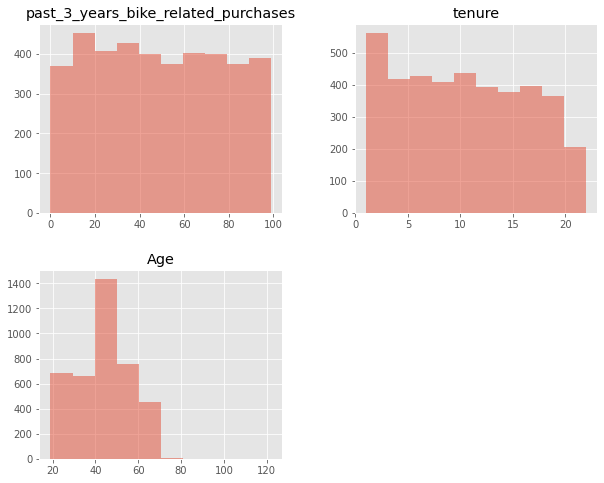

In [ ]:
matplotlib.style.use('ggplot')

demographics.hist(alpha=0.5, figsize=(10, 8))

In [ ]:
demographics.skew()

customer_id                            0.000000
past_3_years_bike_related_purchases    0.045286
tenure                                 0.066188
Age                                    0.065940
dtype: float64

# Preprocessing

# Features Selection

# Algorithm Selection with PyCaret

# Models development

## Models training

## Models evaluation and comparison

## Best model tuning

## Save model

# Apply model on New Customers Dataset